For a detailed reference for any of the things described here, visit the [API Reference](https://bolides.readthedocs.io/en/latest/reference).

# Importing

In [1]:
%load_ext watermark
%reload_ext autoreload
%autoreload 2
# The above two lines are often unnecessary but can be useful if importing code that you are actively editing.
# They make it so that any imported code that you edit is reloaded, so you don't have to restart the kernel or
# anything for changes to take effect when you use that code in the notebook.
from bolides import BolideDataFrame

# Making/saving a BolideDataFrame
## From [neo-bolide.ndc.nasa.gov](https://neo-bolide.ndc.nasa.gov)

In [2]:
bdf = BolideDataFrame(source='website')

## From [USG data](https://cneos.jpl.nasa.gov/fireballs/)

In [3]:
bdf = BolideDataFrame(source='usg')

## From pipeline output (advanced)

In [4]:
# bdf = BolideDataFrame(source='pipeline', files=['20220602_bolide_database_G16.fs', '20220602_bolide_database_G17.fs'])

## To and from serialized objects
Due to the (non-plain-text) nature of some of the data types that can occur in a BolideDataFrame, the best way to preserve all of the data structures when saving and loading is to serialize the data with `pickle`.
Note: only open pickled Python objects from people you trust! 

In [5]:
# saving:
bdf.to_pickle('bolide-data.pkl')
# loading:
bdf = BolideDataFrame(source='pickle', files='bolide-data.pkl')

## To and from csv
Since most of the data is plain-text, and some can be easily stored as plain text and restored into its original data type, `bolides` also supports saving and loading to csv files. Note that the data in some columns (e.g. those that contain a dict or light curves) will not be preserved. Saving to csv lets us look at the data in any spreadsheeting software.

In [6]:
bdf = BolideDataFrame(source='website')
# saving:
bdf.to_csv('bolide-data.csv')
# loading:
bdf = BolideDataFrame(source='csv', files='bolide-data.csv')

# Basic BolideDataFrame usage
The `BolideDataFrame` class can do anything that a Pandas [`DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) can.
First we might want to get an idea of what's going on in our BolideDataFrame.

In [7]:
bdf

datetime  longitude  latitude   source     detectedBy  \
0    2022-07-18 21:30:03      -96.6     -18.5  website  GLM-16,GLM-17   
1    2022-07-18 15:22:59     -111.0      28.0  website  GLM-16,GLM-17   
2    2022-07-18 13:04:02      -40.8       4.2  website         GLM-16   
3    2022-07-18 11:19:00     -119.0     -20.2  website  GLM-16,GLM-17   
4    2022-07-18 08:58:52      -89.0     -15.4  website  GLM-16,GLM-17   
...                  ...        ...       ...      ...            ...   
3906 2017-10-08 08:01:06      -80.6      28.1  website         GLM-16   
3907 2017-10-01 12:43:52     -111.6      35.2  website         GLM-16   
3908 2017-09-05 05:11:25     -116.9      49.3  website         GLM-16   
3909 2017-07-31 22:01:34     -118.5      24.7  website         GLM-16   
3910 2017-07-23 06:12:36      -69.7      -6.6  website         GLM-16   

     confidenceRating lightcurveStructure    energy_g16    energy_g17  \
0              medium           very good  2.284910e-15  2.784850e-15   
1              medium                good  3.084814e-15  2.784850e-15   
2                 low             minimal  3.184802e-15           NaN   
3              medium             minimal  3.584754e-15  1.584994e-15   
4              medium                good  1.684982e-15  6.284430e-15   
...               ...                 ...           ...           ...   
3906             high                 NaN  4.525970e-15           NaN   
3907             high                 NaN  4.525970e-15           NaN   
3908             high                 NaN  7.577910e-15           NaN   
3909             high                 NaN  6.051940e-15           NaN   
3910             high                 NaN  6.051940e-15           NaN   

      brightness_g16  ...       platform reason rejectedBy rejectedDate  \
0       6.767706e-14  ...  GLM-16,GLM-17    NaN        NaN          NaN   
1       6.427747e-14  ...  GLM-16,GLM-17    NaN        NaN          NaN   
2       5.484526e-15  ...         GLM-16    NaN        NaN          NaN   
3       4.884598e-15  ...  GLM-16,GLM-17    NaN        NaN          NaN   
4       8.484166e-15  ...  GLM-16,GLM-17    NaN        NaN          NaN   
...              ...  ...            ...    ...        ...          ...   
3906    9.103880e-15  ...         GLM-16    NaN        NaN          NaN   
3907    1.062985e-14  ...         GLM-16    NaN        NaN          NaN   
3908    4.211158e-13  ...         GLM-16    NaN        NaN          NaN   
3909    4.897844e-13  ...         GLM-16    NaN        NaN          NaN   
3910    1.555970e-13  ...         GLM-16    NaN        NaN          NaN   

                          geometry     phase moon_fullness  solarhour  \
0      POINT (-96.60000 -18.50000)  0.667510      0.664980  14.955885   
1      POINT (-111.00000 28.00000)  0.658906      0.682187   7.878136   
2        POINT (-40.80000 4.20000)  0.655649      0.688701  10.242494   
3     POINT (-119.00000 -20.20000)  0.653187      0.693625   3.278640   
4      POINT (-89.00000 -15.40000)  0.649903      0.700195   2.943214   
...                            ...       ...           ...        ...   
3906    POINT (-80.60000 28.10000)  0.612257      0.775487   2.852754   
3907   POINT (-111.60000 35.20000)  0.382178      0.764357   5.464497   
3908   POINT (-116.90000 49.30000)  0.490368      0.980735  21.418475   
3909   POINT (-118.50000 24.70000)  0.289845      0.579691  14.020207   
3910    POINT (-69.70000 -6.60000)  0.994953      0.010095   1.455125   

        sun_alt             date_retrieved  
0     31.385850 2022-07-28 14:36:58.528223  
1     33.882574 2022-07-28 14:36:58.528223  
2     59.397961 2022-07-28 14:36:58.528223  
3    -44.142054 2022-07-28 14:36:58.528223  
4    -47.816338 2022-07-28 14:36:58.528223  
...         ...                        ...  
3906 -43.869024 2022-07-28 14:36:58.528223  
3907  -8.511078 2022-07-28 14:36:58.528223  
3908 -24.601580 2022-07-28 14:36:58.528223  
3909  61.079233 2022-07-28 14:36:5

What do all these columns mean? The `describe` method will tell us.

In [8]:
bdf.describe()

datetime: Date and time of the bolide detection (UTC)
longitude: Longitude of the bolide (°E).
latitude: Latitude of the bolide (°N).
source: Source of the data.
detectedBy: Satellite(s) that detected the bolide.
confidenceRating: Human-assigned confidence rating for the detection being a bolide.
lightcurveStructure: Human-assigned description of how bolide-like the observed light curve is.
energy_g16: Uncalibrated integrated energy of the bolide as viewed from GOES-16.
energy_g17: Uncalibrated integrated energy of the bolide as viewed from GOES-17.
brightness_g16: Uncalibrated brightness of the bolide as viewed from GOES-16.
brightness_g17: Uncalibrated brightness of the bolide as viewed from GOES-17.
brightness_cat_g16: Brightness category of the bolide as viewed from GOES-16.
brightness_cat_g17: Brightness category of the bolide as viewed from GOES-17.
_id: Unique identifier assigned to the bolide at neo-bolide.ndc.nasa.gov.
description: A human-written description of the bolide det

What sort of data does the "datetime" column contain?

In [9]:
bdf.datetime

0      2022-07-18 21:30:03
1      2022-07-18 15:22:59
2      2022-07-18 13:04:02
3      2022-07-18 11:19:00
4      2022-07-18 08:58:52
               ...        
3906   2017-10-08 08:01:06
3907   2017-10-01 12:43:52
3908   2017-09-05 05:11:25
3909   2017-07-31 22:01:34
3910   2017-07-23 06:12:36
Name: datetime, Length: 3911, dtype: datetime64[ns]

Note that, as well as accessing columns via `bdf.column` syntax, we can also access them like: `bdf['column']`

# Filtering & Search

## Pandas usage
Pandas has a good tutorial on filtering (i.e. subsetting) data [here](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/03_subset_data.html) but below are some examples that are relevant to bolides.

What if we only really want detections that were classified by the human as high-confidence? We can use boolean operators.

In [10]:
bdf.confidenceRating == 'high'

0       False
1       False
2       False
3       False
4       False
        ...  
3906     True
3907     True
3908     True
3909     True
3910     True
Name: confidenceRating, Length: 3911, dtype: bool

Now we have a list of Trues and Falses corresponding to our query. We can use this to index the BolideDataFrame

In [11]:
bdf[bdf.confidenceRating == 'high']

datetime  longitude  latitude   source     detectedBy  \
46   2022-07-07 14:59:48      -86.0       5.4  website  GLM-16,GLM-17   
51   2022-07-07 01:49:24      174.3     -42.0  website         GLM-17   
91   2022-06-25 08:28:10      -88.0     -22.7  website  GLM-16,GLM-17   
100  2022-06-23 14:12:54     -127.6      -1.1  website         GLM-17   
105  2022-06-22 14:33:55     -109.0      50.1  website  GLM-16,GLM-17   
...                  ...        ...       ...      ...            ...   
3906 2017-10-08 08:01:06      -80.6      28.1  website         GLM-16   
3907 2017-10-01 12:43:52     -111.6      35.2  website         GLM-16   
3908 2017-09-05 05:11:25     -116.9      49.3  website         GLM-16   
3909 2017-07-31 22:01:34     -118.5      24.7  website         GLM-16   
3910 2017-07-23 06:12:36      -69.7      -6.6  website         GLM-16   

     confidenceRating lightcurveStructure    energy_g16    energy_g17  \
46               high           very good  2.684862e-15  9.084094e-15   
51               high           very good           NaN  1.758307e-14   
91               high                good  1.684982e-15  4.884598e-15   
100              high           very good           NaN  1.285030e-15   
105              high                good  1.788304e-14  1.438346e-14   
...               ...                 ...           ...           ...   
3906             high                 NaN  4.525970e-15           NaN   
3907             high                 NaN  4.525970e-15           NaN   
3908             high                 NaN  7.577910e-15           NaN   
3909             high                 NaN  6.051940e-15           NaN   
3910             high                 NaN  6.051940e-15           NaN   

      brightness_g16  ...       platform reason rejectedBy rejectedDate  \
46      7.687596e-14  ...  GLM-16,GLM-17    NaN        NaN          NaN   
51               NaN  ...         GLM-17    NaN        NaN          NaN   
91      1.028395e-14  ...  GLM-16,GLM-17    NaN        NaN          NaN   
100              NaN  ...         GLM-17    NaN        NaN          NaN   
105     3.468102e-14  ...  GLM-16,GLM-17    NaN        NaN          NaN   
...              ...  ...            ...    ...        ...          ...   
3906    9.103880e-15  ...         GLM-16    NaN        NaN          NaN   
3907    1.062985e-14  ...         GLM-16    NaN        NaN          NaN   
3908    4.211158e-13  ...         GLM-16    NaN        NaN          NaN   
3909    4.897844e-13  ...         GLM-16    NaN        NaN          NaN   
3910    1.555970e-13  ...         GLM-16    NaN        NaN          NaN   

                         geometry     phase moon_fullness  solarhour  \
46      POINT (-86.00000 5.40000)  0.287079      0.574158   9.179901   
51    POINT (174.30000 -42.00000)  0.268552      0.537104  13.361547   
91    POINT (-88.00000 -22.70000)  0.872919      0.254162   2.558474   
100   POINT (-127.60000 -1.10000)  0.813520      0.372960   5.670276   
105   POINT (-109.00000 50.10000)  0.780275      0.439451   7.264123   
...                           ...       ...           ...        ...   
3906   POINT (-80.60000 28.10000)  0.612257      0.775487   2.852754   
3907  POINT (-111.60000 35.20000)  0.382178      0.764357   5.464497   
3908  POINT (-116.90000 49.30000)  0.490368      0.980735  21.418475   
3909  POINT (-118.50000 24.70000)  0.289845      0.579691  14.020207   
3910   POINT (-69.70000 -6.60000)  0.994953      0.010095   1.455125   

        sun_alt             date_retrieved  
46    45.753924 2022-07-28 14:36:58.528223  
51    22.731787 2022-07-28 14:36:58.528223  
91   -54.783264 2022-07-28 14:36:58.528223  
100   -4.295709 2022-07-28 14:36:58.528223  
105   29.784129 2022-07-28 14:36:58.528223  
...         ...                        ...  
3906 -43.869024 2022-07-28 14:36:58.528223  
3907  -8.511078 2022-07-28 14:36:58.528223  
3908 -24.601580 2022-07-28 14:36:58.528223  
3909  61.079233 2022-07-28 14:36:58.528223  
3

We see that, in the "confidenceRating" column, the only value seems to be "high". But note that we didn't actually save this filtered BolideDataFrame. To do that, we need to assign it to a variable. In this case, we can just overwrite `bdf` as follows:

In [12]:
bdf = bdf[bdf.confidenceRating == 'high']

The same filtering syntax can be used with different lists of Trues and Falses like `bdf.latitude > 30` for bolides with a latitude greater than 30°N, `bdf.detectedBy.str.contains('GLM-16')`, for bolides detected by GLM-16, etc. Advanced users can use operators like `&` (AND), `|` (OR), and `~` (NOT) to combine different conditions. An example for (bolides detected by GLM-16 and not a USG satellite) or detected between 1:00 and 3:00 in solar time would be:

In [13]:
bdf['otherDetectingSources'] = bdf['otherDetectingSources'].fillna('') # fill missing values with strings
strange_bdf = bdf[((bdf.detectedBy.str.contains('GLM-16')) & ~(bdf.otherDetectingSources.str.contains('USG')) | bdf.solarhour.between(1,3))]
strange_bdf.head()

/home/aozerov/projects/bolides/.bolides-venv/lib/python3.10/site-packages/geopandas/geodataframe.py:1456: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


datetime  longitude  latitude   source     detectedBy  \
46  2022-07-07 14:59:48      -86.0       5.4  website  GLM-16,GLM-17   
91  2022-06-25 08:28:10      -88.0     -22.7  website  GLM-16,GLM-17   
105 2022-06-22 14:33:55     -109.0      50.1  website  GLM-16,GLM-17   
156 2022-06-07 22:53:17     -127.0      41.1  website  GLM-16,GLM-17   
169 2022-06-02 21:57:32      -31.3      -8.6  website         GLM-16   

    confidenceRating lightcurveStructure    energy_g16    energy_g17  \
46              high           very good  2.684862e-15  9.084094e-15   
91              high                good  1.684982e-15  4.884598e-15   
105             high                good  1.788304e-14  1.438346e-14   
156             high           very good  3.488100e-14  3.084814e-15   
169             high           very good  3.784730e-15           NaN   

     brightness_g16  ...       platform reason rejectedBy rejectedDate  \
46     7.687596e-14  ...  GLM-16,GLM-17    NaN        NaN          NaN   
91     1.028395e-14  ...  GLM-16,GLM-17    NaN        NaN          NaN   
105    3.468102e-14  ...  GLM-16,GLM-17    NaN        NaN          NaN   
156    1.008764e-12  ...  GLM-16,GLM-17    NaN        NaN          NaN   
169    4.777945e-14  ...         GLM-16    NaN        NaN          NaN   

                        geometry     phase moon_fullness  solarhour  \
46     POINT (-86.00000 5.40000)  0.287079      0.574158   9.179901   
91   POINT (-88.00000 -22.70000)  0.872919      0.254162   2.558474   
105  POINT (-109.00000 50.10000)  0.780275      0.439451   7.264123   
156  POINT (-127.00000 41.10000)  0.285906      0.571812  14.438293   
169   POINT (-31.30000 -8.60000)  0.115910      0.231821  19.904123   

       sun_alt             date_retrieved  
46   45.753924 2022-07-28 14:36:58.528223  
91  -54.783264 2022-07-28 14:36:58.528223  
105  29.784129 2022-07-28 14:36:58.528223  
156  54.377301 2022-07-28 14:36:58.528223  
169 -29.612835 2022-07-28 14:36:58.528223  

[5 rows x 50 columns]

## Bolide-specific methods

Filtering by date is made a little simpler by the `filter_date` method. This method relies on `datetime.datetime.fromisoformat`, which can accept strings that represent dates in a few different formats documented [here](https://docs.python.org/3/library/datetime.html#datetime.datetime.fromisoformat). If we want to focus on the 2020 Leonids, which we from our bountiful knowledge know happened between November 6 and November 30, we can filter like so:

In [14]:
leonids = bdf.filter_date(start='2020-11-06', end='2020-11-30')
leonids.head()

datetime  longitude  latitude   source     detectedBy  \
2248 2020-11-27 08:28:09     -117.5     -42.5  website  GLM-16,GLM-17   
2252 2020-11-25 12:20:49      -81.0     -30.5  website  GLM-16,GLM-17   
2321 2020-11-18 18:01:08     -128.9      25.5  website  GLM-16,GLM-17   
2327 2020-11-18 16:58:04     -119.2      19.9  website  GLM-16,GLM-17   
2336 2020-11-18 15:41:01     -128.8      20.0  website  GLM-16,GLM-17   

     confidenceRating lightcurveStructure    energy_g16    energy_g17  \
2248             high                 NaN  8.784130e-15  3.284790e-15   
2252             high                 NaN  2.084934e-15  3.958043e-14   
2321             high                 NaN  1.048393e-14  1.285030e-15   
2327             high                 NaN  4.284670e-15  1.884958e-15   
2336             high                 NaN  1.168378e-14  1.584994e-15   

      brightness_g16  ...       platform reason rejectedBy rejectedDate  \
2248    7.267646e-14  ...  GLM-16,GLM-17    NaN        NaN          NaN   
2252    1.977614e-13  ...  GLM-16,GLM-17    NaN        NaN          NaN   
2321    1.179710e-13  ...  GLM-16,GLM-17    NaN        NaN          NaN   
2327    3.478101e-14  ...  GLM-16,GLM-17    NaN        NaN          NaN   
2336    1.671651e-13  ...  GLM-16,GLM-17    NaN        NaN          NaN   

                          geometry     phase moon_fullness solarhour  \
2248  POINT (-117.50000 -42.50000)  0.412002      0.824003  0.840605   
2252   POINT (-81.00000 -30.50000)  0.349608      0.699215  7.161420   
2321   POINT (-128.90000 25.50000)  0.120057      0.240115  9.670226   
2327   POINT (-119.20000 19.90000)  0.118571      0.237142  9.265930   
2336   POINT (-128.80000 20.00000)  0.116755      0.233510  7.341912   

        sun_alt             date_retrieved  
2248 -25.219623 2022-07-28 14:36:58.528223  
2252  24.993325 2022-07-28 14:36:58.528223  
2321  33.679786 2022-07-28 14:36:58.528223  
2327  33.785811 2022-07-28 14:36:58.528223  
2336  11.099419 2022-07-28 14:36:58.528223  

[5 rows x 50 columns]

We can omit the `start` argument to only filter for bolides that occurred a certain date. Similarly we can omit the `end` argument if we only want bolides that happened after some start date. We can also omit both arguments, but that would be silly.

If our knowledge of meteor showers is not quite so bountiful, we can use the `filter_shower` method to filter for bolides within 10 days of the peak time of the Leonids:

In [15]:
leonids = bdf.filter_shower(shower='LEO', years=2020, padding=10)
leonids.head()

datetime  longitude  latitude   source     detectedBy  \
2248 2020-11-27 08:28:09     -117.5     -42.5  website  GLM-16,GLM-17   
2252 2020-11-25 12:20:49      -81.0     -30.5  website  GLM-16,GLM-17   
2321 2020-11-18 18:01:08     -128.9      25.5  website  GLM-16,GLM-17   
2327 2020-11-18 16:58:04     -119.2      19.9  website  GLM-16,GLM-17   
2336 2020-11-18 15:41:01     -128.8      20.0  website  GLM-16,GLM-17   

     confidenceRating lightcurveStructure    energy_g16    energy_g17  \
2248             high                 NaN  8.784130e-15  3.284790e-15   
2252             high                 NaN  2.084934e-15  3.958043e-14   
2321             high                 NaN  1.048393e-14  1.285030e-15   
2327             high                 NaN  4.284670e-15  1.884958e-15   
2336             high                 NaN  1.168378e-14  1.584994e-15   

      brightness_g16  ...       platform reason rejectedBy rejectedDate  \
2248    7.267646e-14  ...  GLM-16,GLM-17    NaN        NaN          NaN   
2252    1.977614e-13  ...  GLM-16,GLM-17    NaN        NaN          NaN   
2321    1.179710e-13  ...  GLM-16,GLM-17    NaN        NaN          NaN   
2327    3.478101e-14  ...  GLM-16,GLM-17    NaN        NaN          NaN   
2336    1.671651e-13  ...  GLM-16,GLM-17    NaN        NaN          NaN   

                          geometry     phase moon_fullness solarhour  \
2248  POINT (-117.50000 -42.50000)  0.412002      0.824003  0.840605   
2252   POINT (-81.00000 -30.50000)  0.349608      0.699215  7.161420   
2321   POINT (-128.90000 25.50000)  0.120057      0.240115  9.670226   
2327   POINT (-119.20000 19.90000)  0.118571      0.237142  9.265930   
2336   POINT (-128.80000 20.00000)  0.116755      0.233510  7.341912   

        sun_alt             date_retrieved  
2248 -25.219623 2022-07-28 14:36:58.528223  
2252  24.993325 2022-07-28 14:36:58.528223  
2321  33.679786 2022-07-28 14:36:58.528223  
2327  33.785811 2022-07-28 14:36:58.528223  
2336  11.099419 2022-07-28 14:36:58.528223  

[5 rows x 50 columns]

If we know that a bolide event occurred at a certain time or place, we can use the `get_closest_by_time` and `get_closest_by_loc` methods: 

In [16]:
bdf.get_closest_by_time('2022-06-07 22:53:00', n=2)

datetime  longitude  latitude   source     detectedBy  \
156 2022-06-07 22:53:17     -127.0      41.1  website  GLM-16,GLM-17   
169 2022-06-02 21:57:32      -31.3      -8.6  website         GLM-16   

    confidenceRating lightcurveStructure    energy_g16    energy_g17  \
156             high           very good  3.488100e-14  3.084814e-15   
169             high           very good  3.784730e-15           NaN   

     brightness_g16  ...       platform reason rejectedBy rejectedDate  \
156    1.008764e-12  ...  GLM-16,GLM-17    NaN        NaN          NaN   
169    4.777945e-14  ...         GLM-16    NaN        NaN          NaN   

                        geometry     phase moon_fullness  solarhour  \
156  POINT (-127.00000 41.10000)  0.285906      0.571812  14.438293   
169   POINT (-31.30000 -8.60000)  0.115910      0.231821  19.904123   

       sun_alt             date_retrieved  
156  54.377301 2022-07-28 14:36:58.528223  
169 -29.612835 2022-07-28 14:36:58.528223  

[2 rows x 50 columns]

In [17]:
bdf.get_closest_by_loc(lon=-31, lat=9, n=2)

datetime  longitude  latitude   source detectedBy  \
3851 2019-05-22 15:16:47      -37.1      10.8  website     GLM-16   
195  2022-05-24 02:38:20      -30.0      16.4  website     GLM-16   

     confidenceRating lightcurveStructure    energy_g16  energy_g17  \
3851             high                 NaN  1.525970e-15         NaN   
195              high           very good  3.984706e-15         NaN   

      brightness_g16  ...  platform reason rejectedBy rejectedDate  \
3851    6.973683e-13  ...    GLM-16    NaN        NaN          NaN   
195     7.558944e-13  ...    GLM-16    NaN        NaN          NaN   

                        geometry     phase moon_fullness  solarhour  \
3851  POINT (-37.10000 10.80000)  0.600222      0.799556  12.861960   
195   POINT (-30.00000 16.40000)  0.785011      0.429979   0.691882   

        sun_alt             date_retrieved  
3851  74.291394 2022-07-28 14:36:58.528223  
195  -51.486000 2022-07-28 14:36:58.528223  

[2 rows x 50 columns]

What if we want to filter USG data to only keep bolides that were potentially detectable by GLM 16 and GLM 17? The `filter_observation` method will do this for us.

In [18]:
bdf = BolideDataFrame(source='usg')
bdf = bdf.filter_observation(sensors=['glm16','glm17'])
len(bdf)

77

# Maps

Geospatial data without a map is like an opinion expressed without an analogy. For this reason the `BolideDataFrame` class has a built-in plotting method, `plot_detections()`.



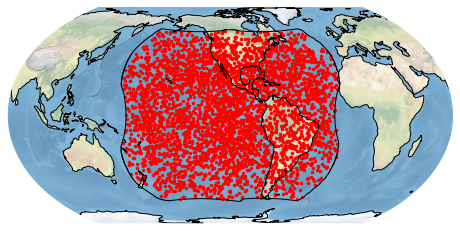

In [19]:
import matplotlib.pyplot as plt
bdf = BolideDataFrame(source='website')
bdf.plot_detections(boundary='goes')
plt.show()

If you are familiar with matplotlib syntax, all of the same sorts of things work. Here is an example taking advantage of matplotlib:

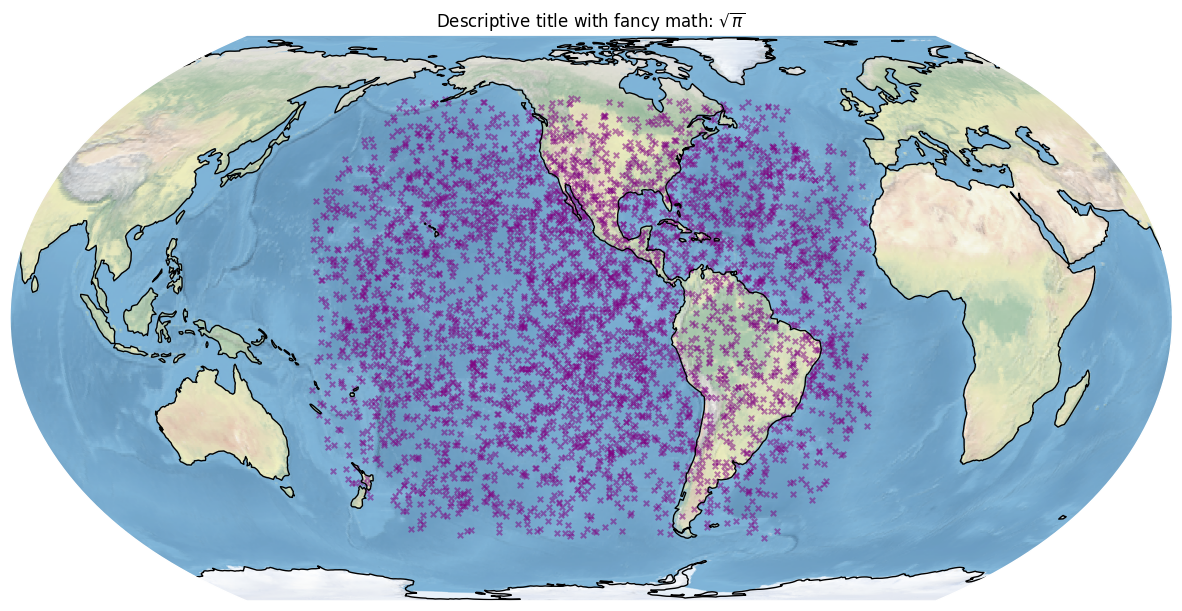

In [20]:
fig, ax = bdf.plot_detections(marker='x', alpha=0.5, color='purple', s=15, figsize=(15,9))
plt.title('Descriptive title with fancy math: $\sqrt{\pi}$')  # add a title
plt.savefig('descriptive-filename.png', dpi=300, bbox_inches='tight')  # save to disk
plt.show()

[Here](https://matplotlib.org/stable/tutorials/index.html) are some good tutorials on matplotlib.

If we only want to plot detections by GLM-17 and thus only really need the GOES-West position field-of-view boundary, we can do that as follows below. Note how we can filter and plot in the same line.

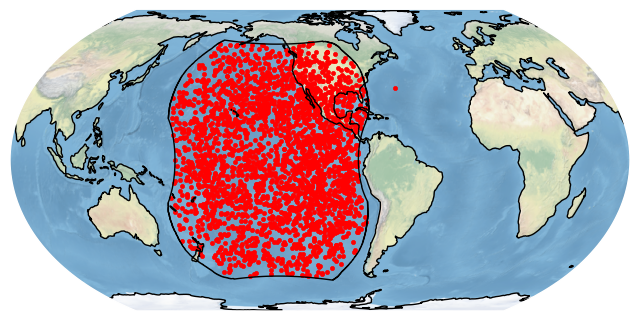

In [21]:
bdf[bdf.detectedBy.str.contains('GLM-17')].plot_detections(boundary='goes-w')
plt.show()

This shows us an interesting point in the Atlantic outside of the GOES-West GLM field-of-view. This is from when GOES-17 was not yet in the GOES-West position. If we only want points within the GOES-West GLM field-of-view, we can filter by field of view instead:

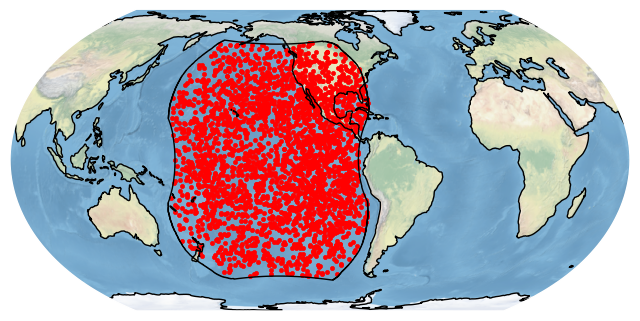

In [22]:
bdf.filter_boundary(boundary=['goes-w']).plot_detections(boundary='goes-w')
plt.show()

What if we don't like this map projection? `plot_detections` can accept any map projection in the form of a Cartopy CoordinateReferenceSystem object in the `crs` argument. Here is a map roughly from the perspective of GOES-16:

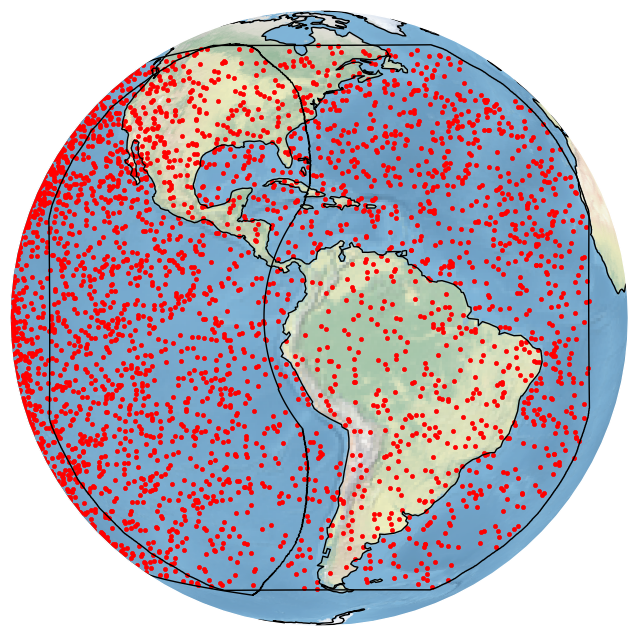

In [23]:
import cartopy.crs as ccrs
crs = ccrs.Geostationary(central_longitude = -75.2)
bdf.plot_detections(crs=crs, boundary=['goes-e','goes-w'])
plt.show()

We can get the same plot by using the built-in GOES_E CRS:

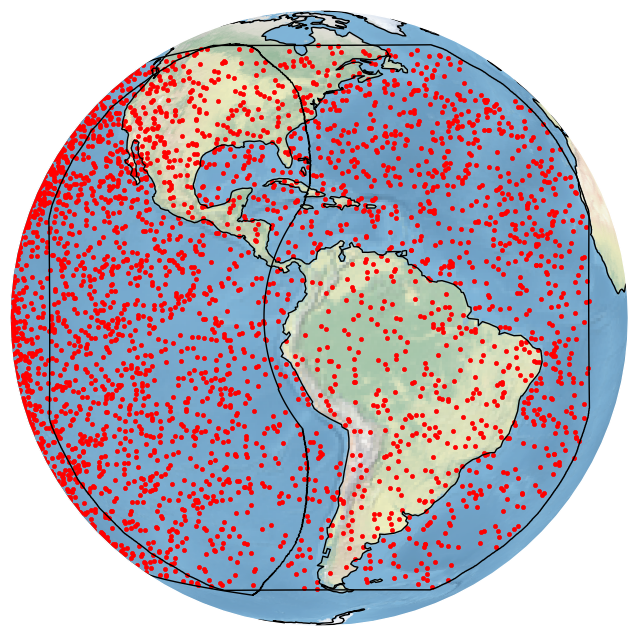

In [24]:
import bolides.crs as bcrs
bdf.plot_detections(crs=bcrs.GOES_E(), boundary=['goes-e','goes-w'])
plt.show()

[Here](https://scitools.org.uk/cartopy/docs/latest/reference/crs.html) is the documentation on CoordinateReferenceSystem objects, and [here](https://scitools.org.uk/cartopy/docs/latest/reference/projections.html) is a handy list of built-in projections. If you are really into map projections you can get some projections defined by an EPSG code using `ccrs.epsg`. Here is an example on the US National Atlas Equal Area projection (EPSG:2163):

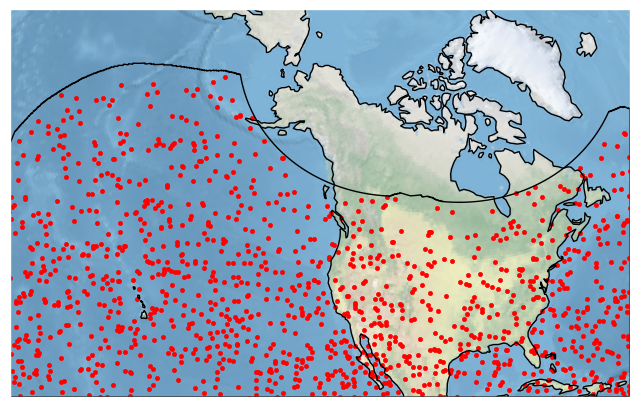

In [25]:
crs = ccrs.epsg(2163)
bdf.plot_detections(crs=crs, boundary='goes')
plt.show()

In the examples above, it would be nice to see which bolides were detected by which satellite. `plot_detections` handles automatic coloring of categorical data when a column name is passed in:

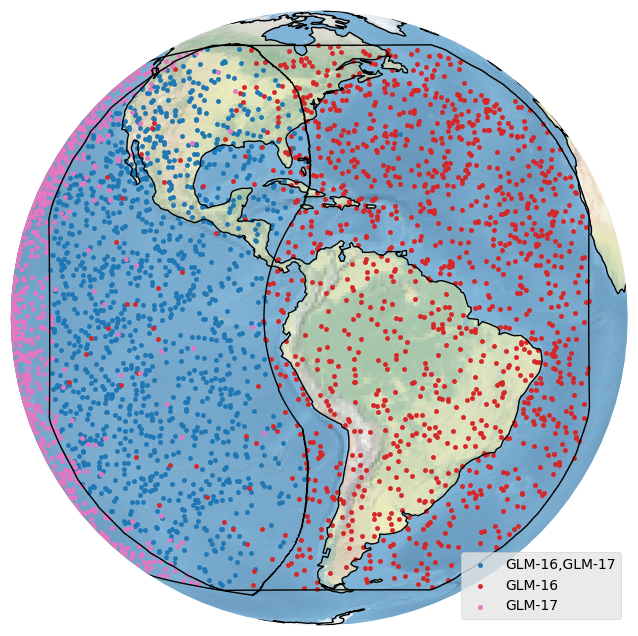

In [26]:
bdf.plot_detections(crs=bcrs.GOES_E(), category='detectedBy', boundary=['goes-e','goes-w'])
plt.show()

Neat. We can also plot quantitative data:

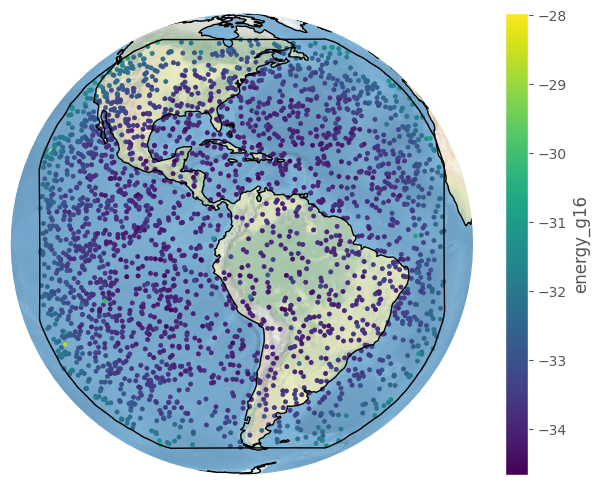

In [27]:
import numpy as np
fig, ax = bdf.plot_detections(crs=bcrs.GOES_E(), c=np.log(bdf.energy_g16), boundary='goes-e', figsize=(8,6))
plt.show()

The `BolideDataFrame` class is technically a subclass of the `GeoDataFrame` class from GeoPandas, so if you are familiar with it you can use their plotting methods too (see [here](https://geopandas.org/en/stable/docs/user_guide/mapping.html)).

We might also be interested in the density of bolides. The handy plot_density method will compute and plot this:

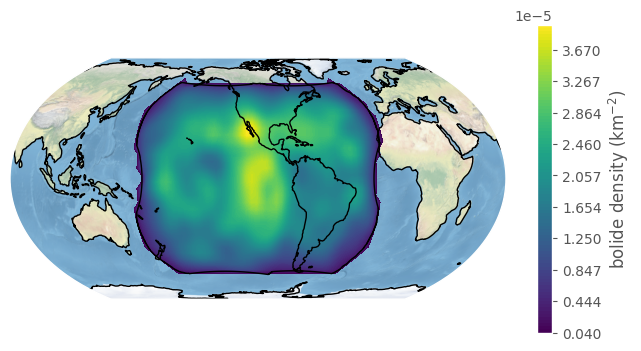

In [28]:
fig, ax = bdf.plot_density(boundary='goes', figsize=(8,4))
plt.show()

We can change the bandwidth argument to get a finer (and noisier!) density estimate:

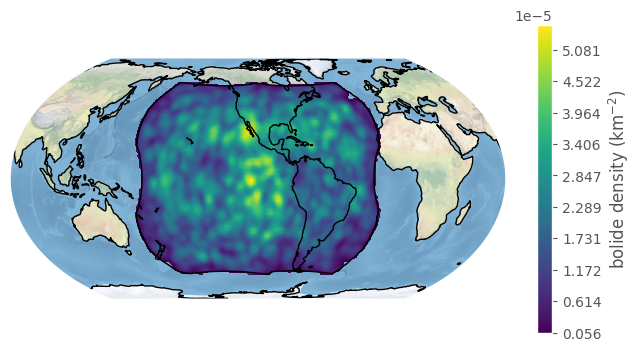

In [29]:
fig, ax = bdf.plot_density(bandwidth=2, lat_resolution=200, lon_resolution=100, boundary='goes', figsize=(8,4))
plt.show()

# Date Histograms

One useful visualization is the number of bolides detected at different dates. The `plot_dates` method handles this.

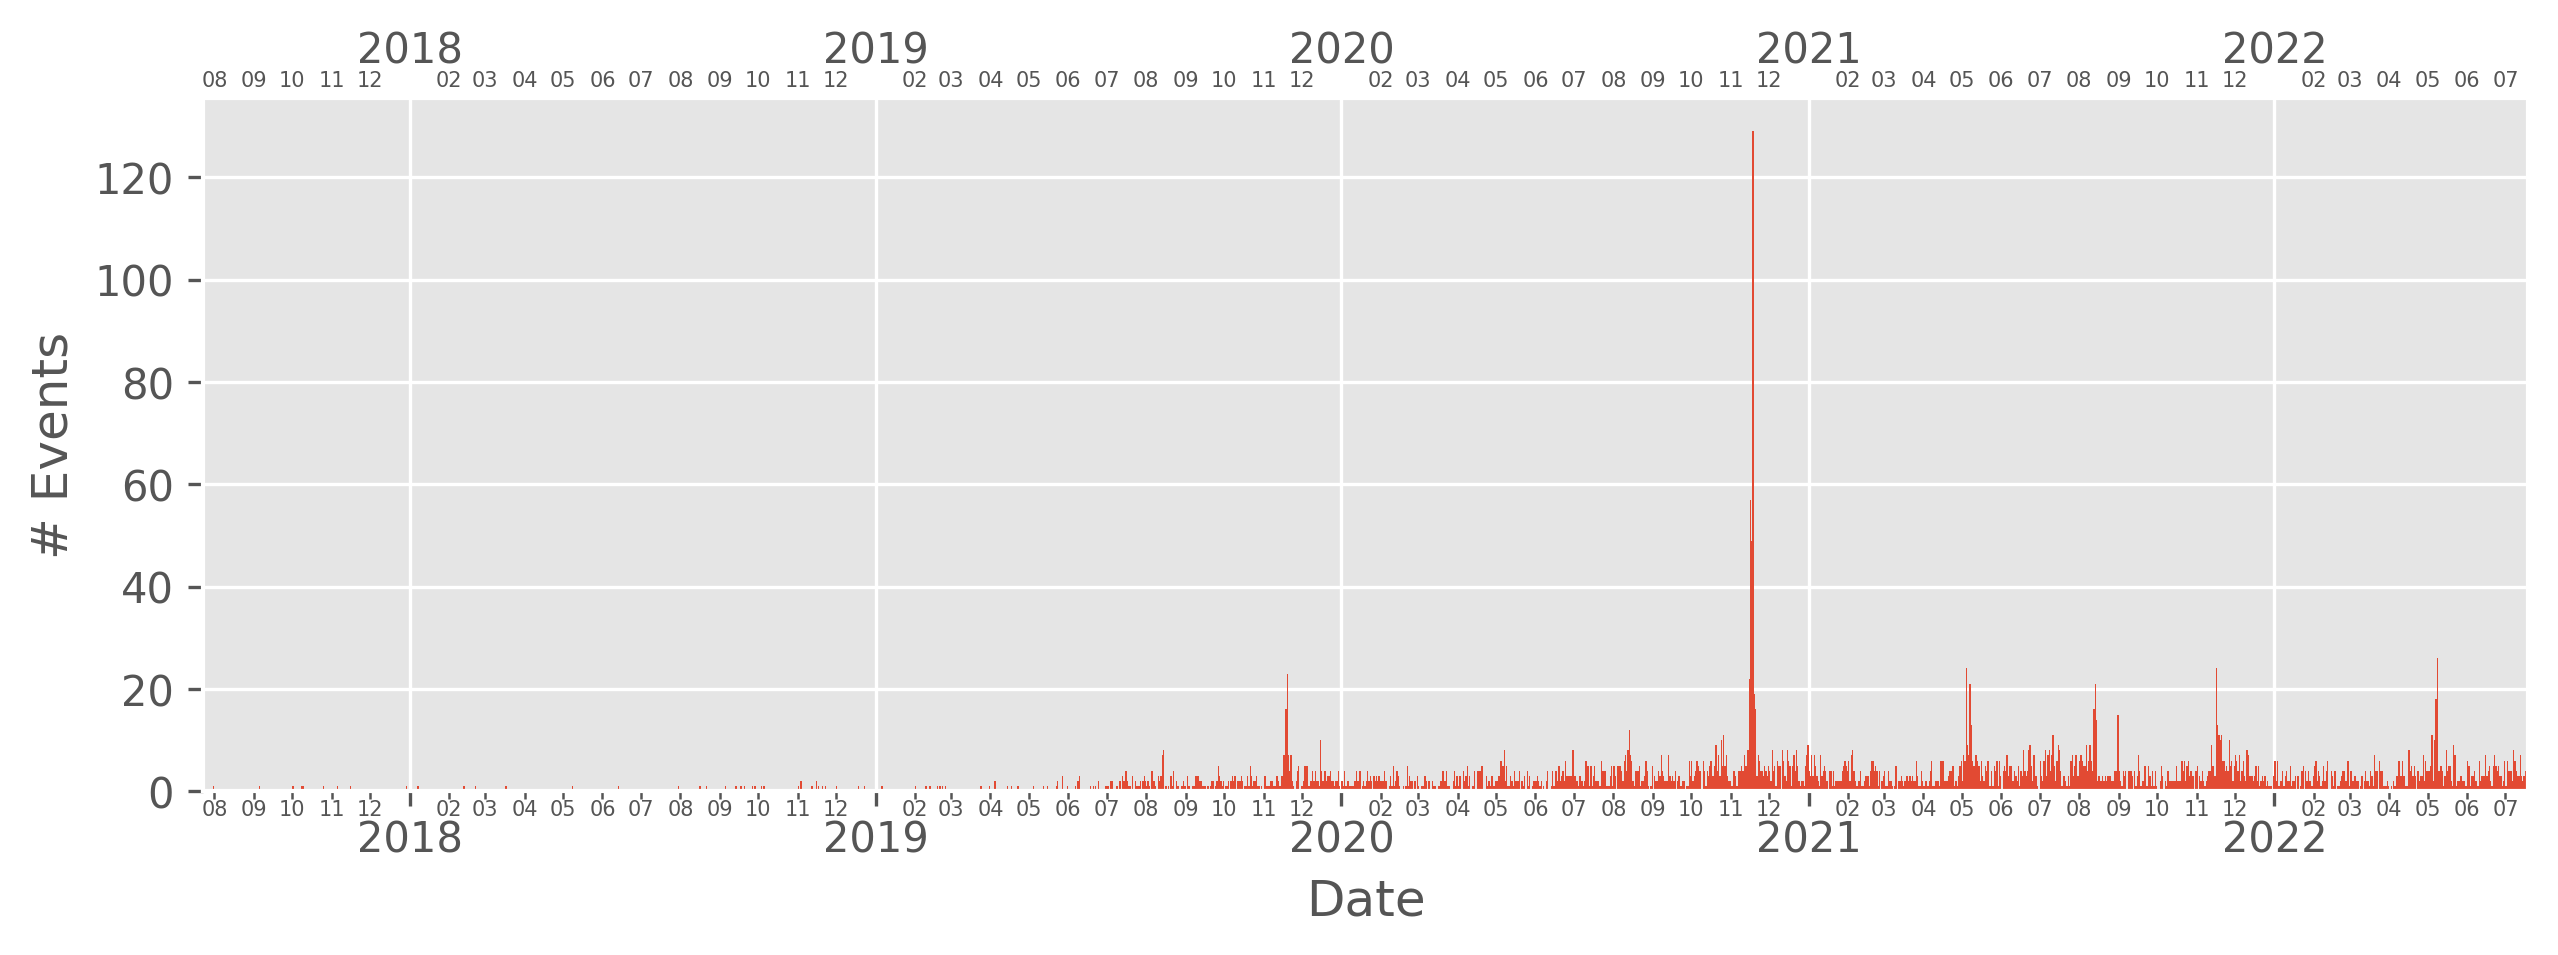

In [30]:
bdf.plot_dates()
plt.show()

Similar to `plot_detections`, regular matplotlib syntax works. If we are unhappy with the default style used by `bolides`, (ggplot), we can also pass in any [matplotlib style](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html) into the style argument (This also works for `plot_detections`).

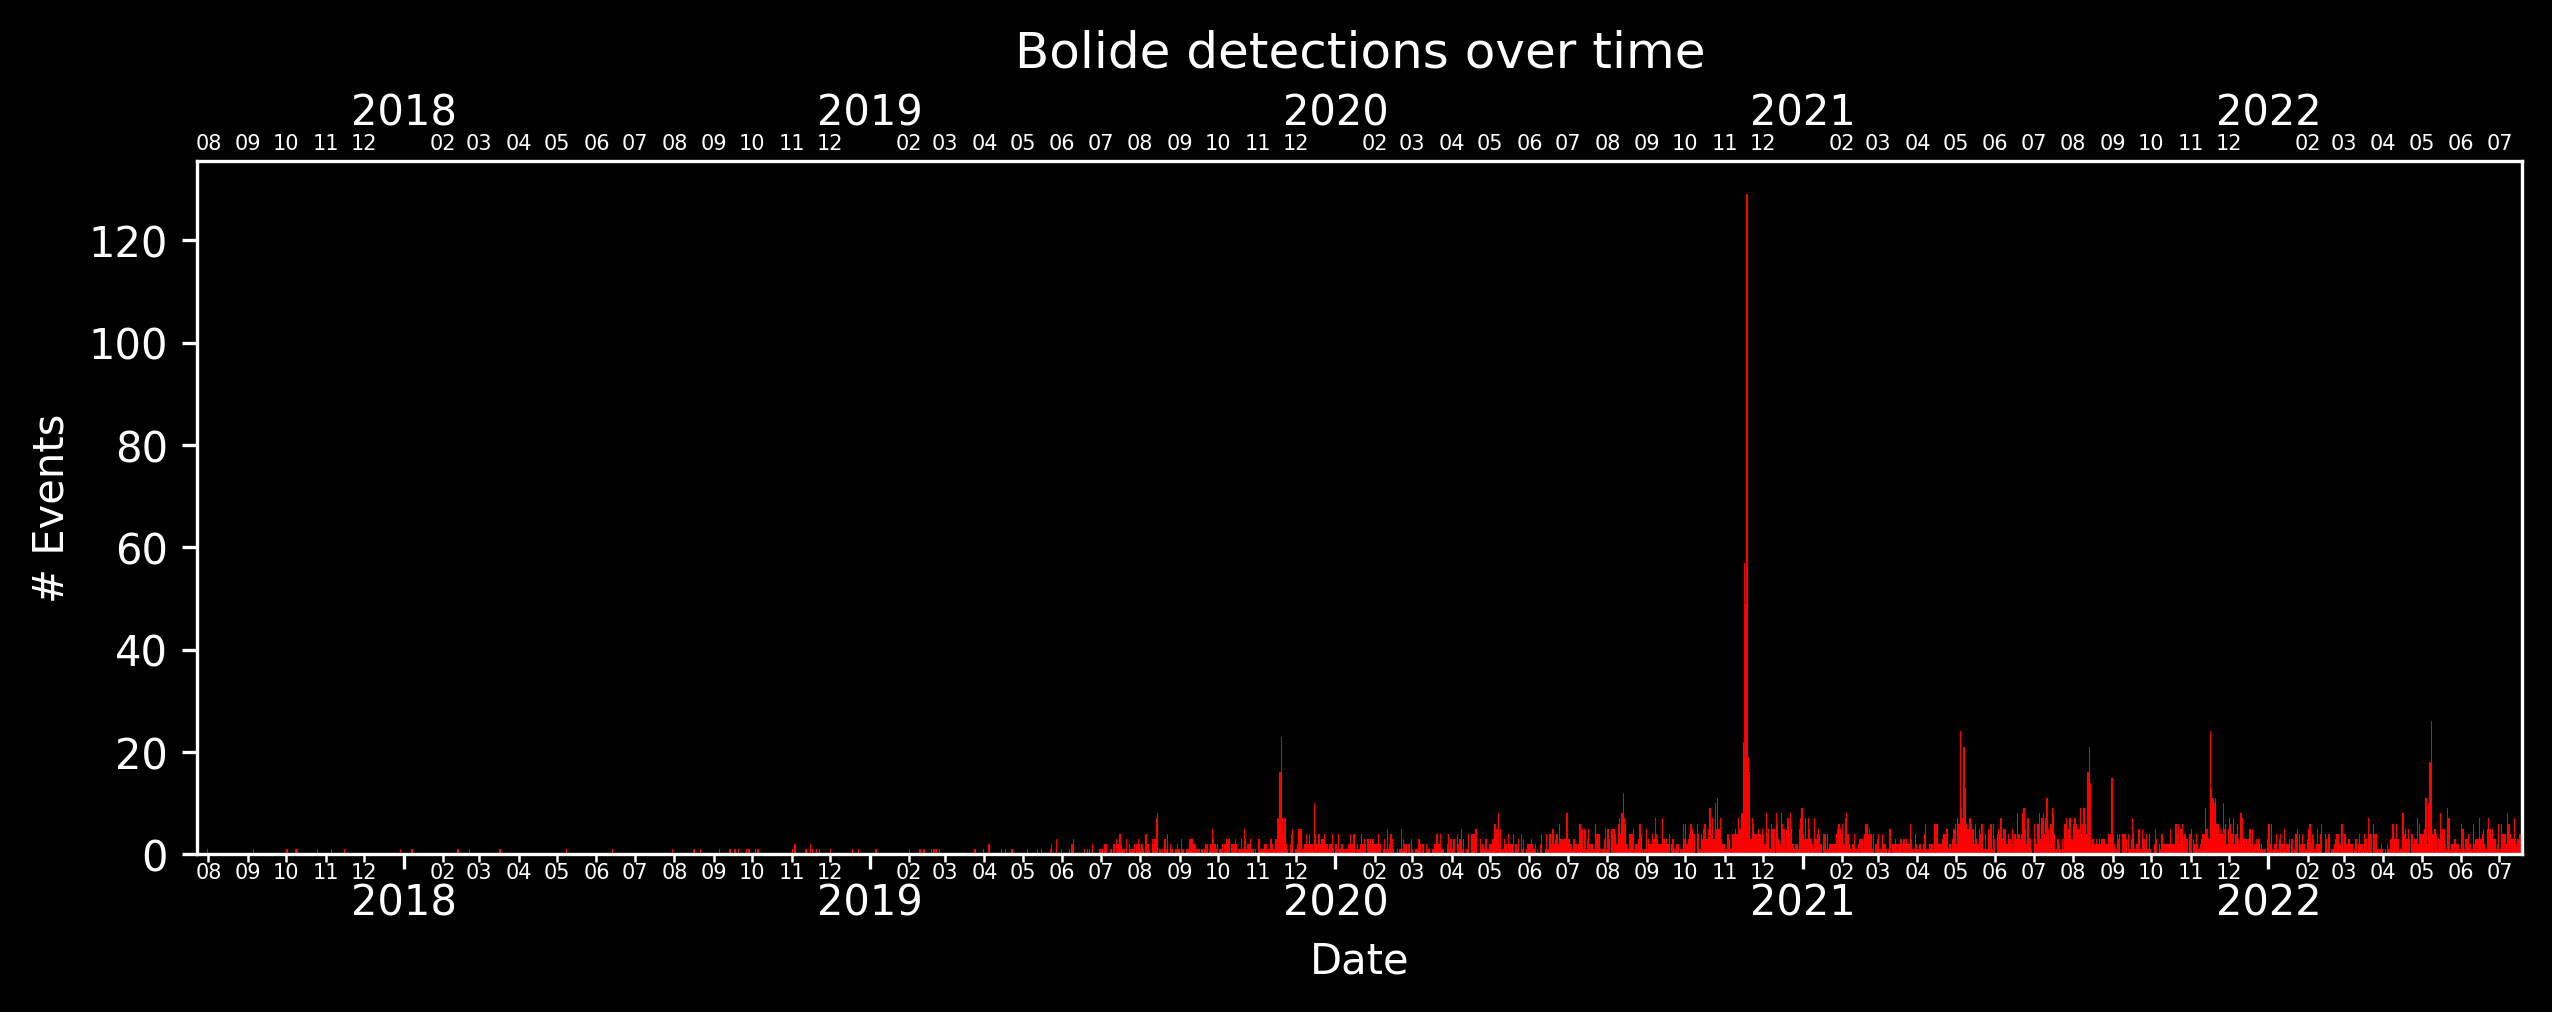

In [31]:
bdf.plot_dates(color='red', style='dark_background')
plt.title('Bolide detections over time')
plt.show()

 `plot_dates` also has a built-in date filter that works similarly to `filter_date`, and the frequency of the binning can be specified in the `freq` argument. The argument can take strings like "4D", "1Y", "3M", and so on. The `showers` argument also allows plotting the dates of meteor showers. Similar to `plot_detections`, we can also filter and plot in the same line.

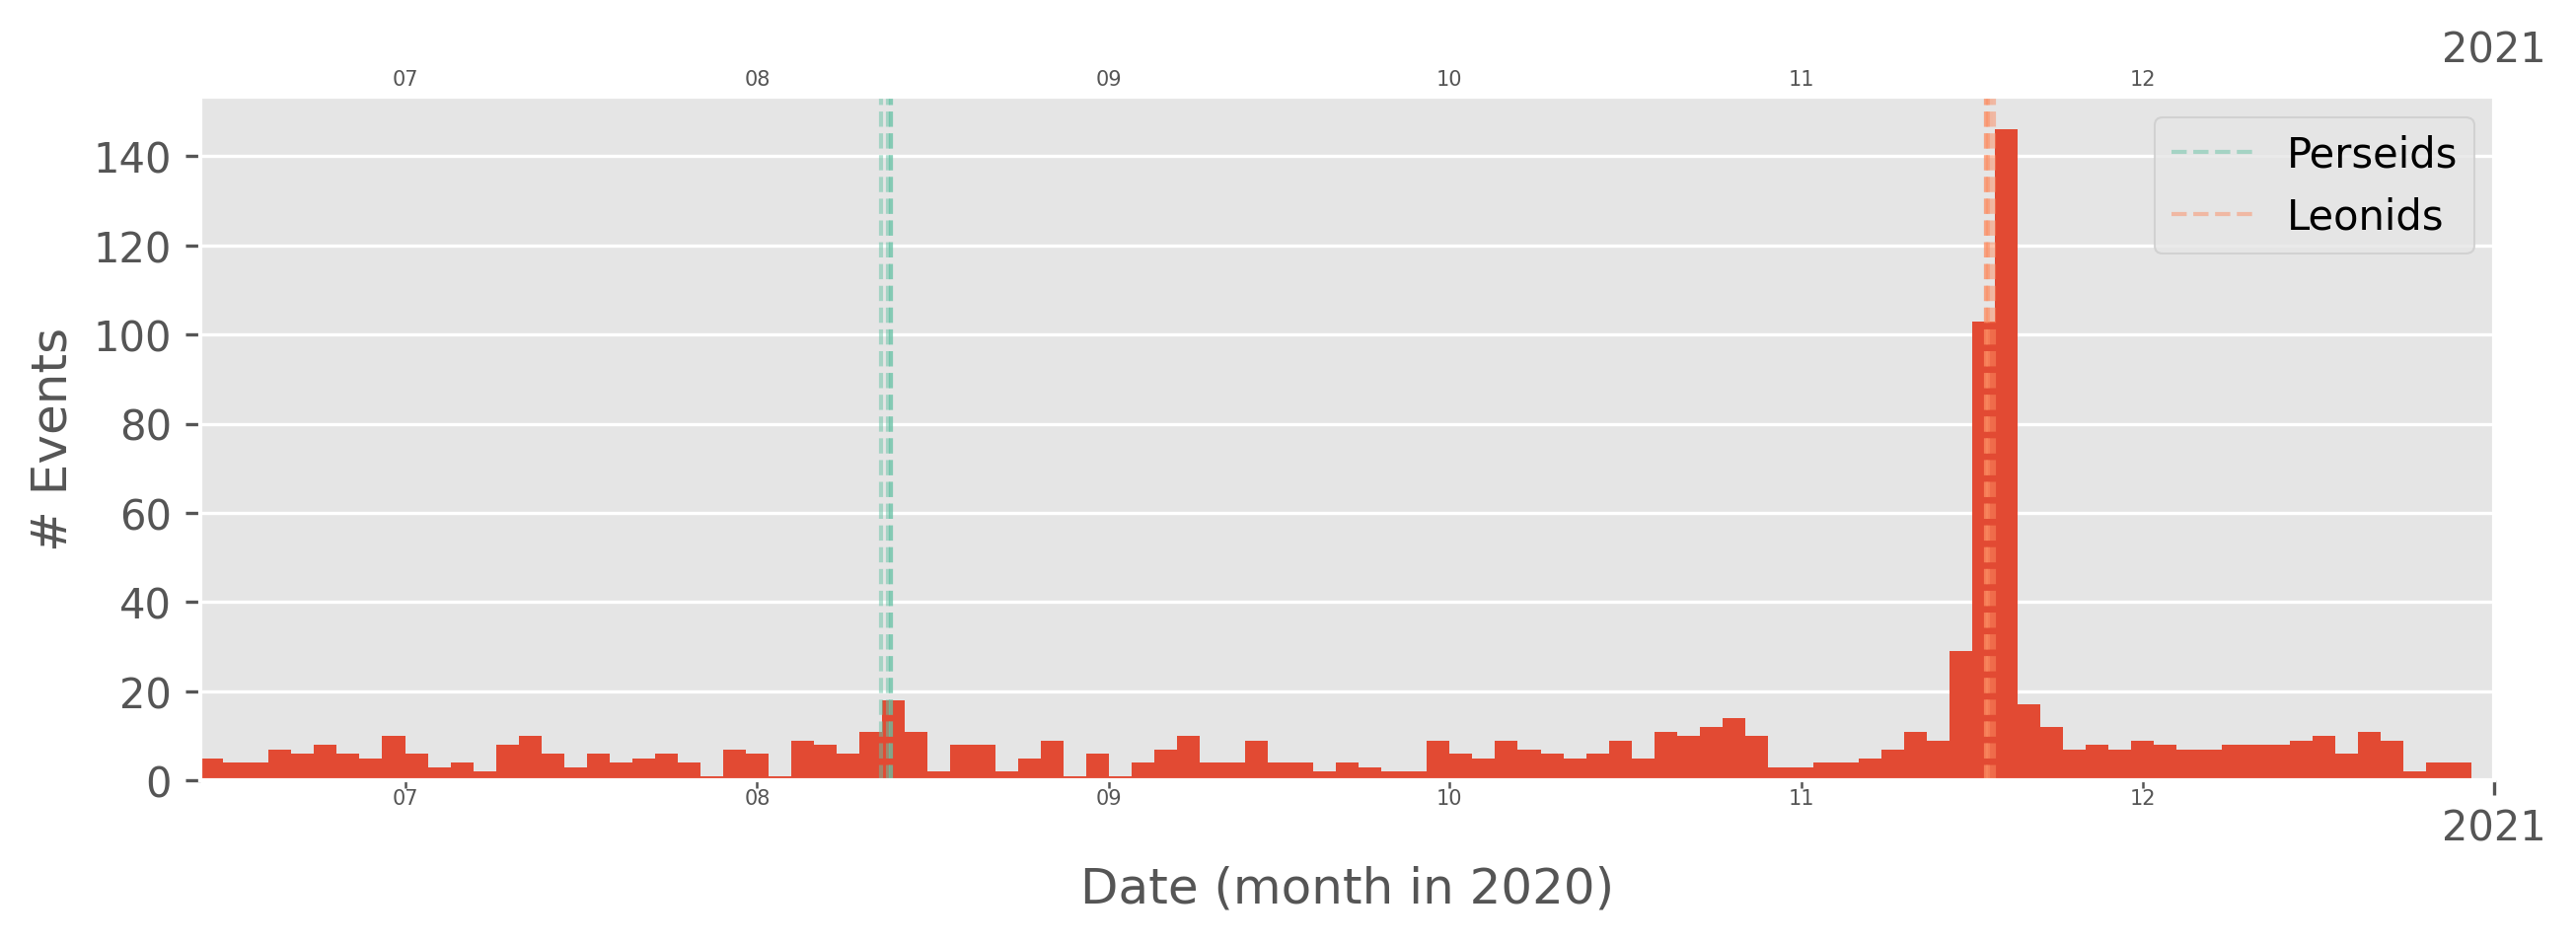

In [32]:
bdf[bdf.solarhour<12].plot_dates(freq="2D", start="2020-06-13", end="2021-01-01", showers=['LEO', 'PER'])
plt.show()

# Light curves

We also have data on bolide light curves, which can be interesting to look at. Let's first filter a small set of bolides to download light curves for:

In [33]:
bdf = BolideDataFrame(source='website')
bdf = bdf.filter_date(start='2022-06-01',end='2022-06-13')

Now we need to pull some data from the website:

In [34]:
bdf.add_website_data()

Exciting. Now we can plot light curves by accessing the `lightcurves` column:

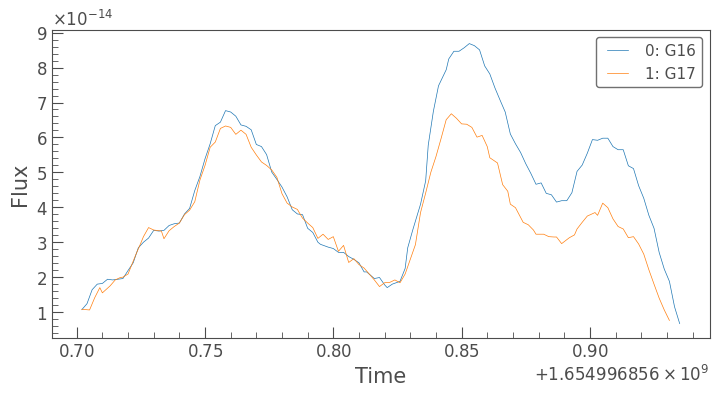

In [35]:
bdf.lightcurves.iloc[2].plot()
plt.show()

All of this is handled by the [lightkurve](http://docs.lightkurve.org/) package. The plots work similarly to `plot_detections` and `plot_dates` in that we can pass in regular matplotlib arguments.

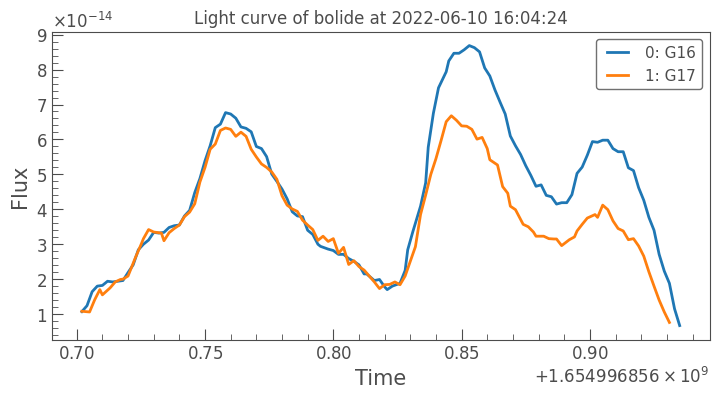

In [36]:
bdf.lightcurves.iloc[2].plot(linewidth=2)
plt.title('Light curve of bolide at '+str(bdf.datetime.iloc[6]))
plt.savefig(bdf._id.iloc[2] + '.png', dpi=300, bbox_inches='tight')
plt.show()

# Augmenting the data

`bolides` also supports automatically combining bolide data from multiple sources via the `augment` method. For instance, we may want to add USG data to GLM data to get additional information.

In [37]:
glm = BolideDataFrame(source='website')
usg = BolideDataFrame(source='usg')

print("columns before augmentation:", len(glm.columns))
print("length before augmentation:", len(glm), 'bolides')

combined = glm.augment(usg)

print("columns after augmentation:", len(combined.columns))
print("length after augmentation:", len(combined), 'bolides')

columns before augmentation: 50
length before augmentation: 3911 bolides


Augmenting data: 100%|█████████████████████| 3911/3911 [00:16<00:00, 239.57it/s]

columns after augmentation: 64
length after augmentation: 3911 bolides


Note how the combined BolideDataFrame has more columns. These are coming from USG data. Columns ending in `_y` are the USG versions of those that existed in both data sets. Note how the length of the BolideDataFrame stays the same. This is because, by default `augment` keeps detections that only exist in the GLM data. If we instead want to only keep bolides that exist in both BolideDataFrames, we can use the `intersection` argument:

In [38]:
print(len(glm.augment(usg, intersection=True)), 'bolides')

Augmenting data: 100%|█████████████████████| 3911/3911 [00:14<00:00, 267.05it/s]

76 bolides


Here is some metadata about this notebook:

In [39]:
%watermark -uivm -p cartopy -rb

Last updated: 2022-07-28T14:38:58.428907-07:00

Python implementation: CPython
Python version       : 3.10.4
IPython version      : 8.4.0

cartopy: 0.20.3

Compiler    : GCC 11.2.0
OS          : Linux
Release     : 5.17.15-76051715-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

Git repo: https://github.com/jcsmithhere/bolides.git

Git branch: bdf-implementation



In [40]:
!proj

Rel. 8.2.1, January 1st, 2022
usage: proj [-bdeEfiIlmorsStTvVwW [args]] [+opt[=arg] ...] [file ...]
